In [24]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/beefsack/bgg-ranking-historicals/master/2019-05-02.csv")

In [3]:
df.head()

ID                                           Name  Year  Rank  Average  \
0  174430                                     Gloomhaven  2017     1     8.90   
1  161936                      Pandemic Legacy: Season 1  2015     2     8.64   
2  182028  Through the Ages: A New Story of Civilization  2015     3     8.53   
3  167791                              Terraforming Mars  2016     4     8.40   
4   12333                              Twilight Struggle  2005     5     8.33   

   Bayes average  Users rated  \
0          8.611        24574   
1          8.489        30921   
2          8.258        15551   
3          8.242        38331   
4          8.175        34268   

                                                 URL  \
0                       /boardgame/174430/gloomhaven   
1         /boardgame/161936/pandemic-legacy-season-1   
2  /boardgame/182028/through-ages-new-story-civil...   
3                /boardgame/167791/terraforming-mars   
4                 /boardgame/12333/twilight-struggle   

                                           Thumbnail  
0  https://cf.geekdo-images.com/micro/img/8JYMPXd...  
1  https://cf.geekdo-images.com/micro/img/KbAKyhb...  
2  https://cf.geekdo-images.com/micro/img/APvZ_BY...  
3  https://cf.geekdo-images.com/micro/img/71v8jF5...  
4  https://cf.geekdo-images.com/micro/img/uStZr7_...

In [8]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "2019-05-02"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

df = pd.read_csv("https://raw.githubusercontent.com/beefsack/bgg-ranking-historicals/master/2019-05-02.csv")

create_download_link(df)

In [11]:
df2 = pd.read_csv("Resources/2020-08-19.csv")

In [12]:
df2.head()

Unnamed: 0     ID         Name  Year  Rank  Average  Bayes average  \
0          90  30549     Pandemic  2008    91     7.62          7.518   
1         172    822  Carcassonne  2000   173     7.42          7.311   
2         380     13        Catan  1995   381     7.16          7.001   
3          49  68448    7 Wonders  2010    50     7.76          7.662   
4          87  36218     Dominion  2008    88     7.63          7.521   

   Users rated                         URL  \
0        96186   /boardgame/30549/pandemic   
1        96181  /boardgame/822/carcassonne   
2        96171         /boardgame/13/catan   
3        79830  /boardgame/68448/7-wonders   
4        74933   /boardgame/36218/dominion   

                                           Thumbnail  
0  https://cf.geekdo-images.com/micro/img/0m3-oqB...  
1  https://cf.geekdo-images.com/micro/img/z0tTaij...  
2  https://cf.geekdo-images.com/micro/img/e0y6Bog...  
3  https://cf.geekdo-images.com/micro/img/h-Ejv31...  
4  https://cf.geekdo-images.com/micro/img/VYp2s2f...

In [14]:
bginfo_df = pd.read_csv("Resources/games_detailed_info.csv")

C:\Users\Reila\AppData\Local\Temp/ipykernel_788/2915646691.py:1: DtypeWarning: Columns (29,48) have mixed types. Specify dtype option on import or set low_memory=False.
  bginfo_df = pd.read_csv("Resources/games_detailed_info.csv")


In [15]:
bginfo_df.head()

Unnamed: 0       type     id  \
0           0  boardgame  30549   
1           1  boardgame    822   
2           2  boardgame     13   
3           3  boardgame  68448   
4           4  boardgame  36218   

                                           thumbnail  \
0  https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...   
1  https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...   
2  https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...   
3  https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...   
4  https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...   

                                               image      primary  \
0  https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...     Pandemic   
1  https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...  Carcassonne   
2  https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...        Catan   
3  https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...    7 Wonders   
4  https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...     Dominion   

                                           alternate  \
0  ['EPIZOotic', 'Pandemia', 'Pandemia 10 Anivers...   
1  ['Carcassonne Jubilee Edition', 'Carcassonne: ...   
2  ['CATAN', 'Catan (Колонизаторы)', 'Catan telep...   
3  ['7 csoda', '7 Cudów Świata', '7 divů světa', ...   
4  ['Dominion: Basisspiel', 'Dominion: In naam va...   

                                         description  yearpublished  \
0  In Pandemic, several virulent diseases have br...           2008   
1  Carcassonne is a tile-placement game in which ...           2000   
2  In CATAN (formerly The Settlers of Catan), pla...           1995   
3  You are the leader of one of the 7 great citie...           2010   
4  &quot;You are a monarch, like your parents bef...           2008   

   minplayers  ...  War Game Rank Customizable Rank Children's Game Rank  \
0           2  ...            NaN               NaN                  NaN   
1           2  ...            NaN               NaN                  NaN   
2           3  ...            NaN               NaN                  NaN   
3           2  ...            NaN               NaN                  NaN   
4           2  ...            NaN               NaN                  NaN   

  RPG Item Rank  Accessory Rank  Video Game Rank  Amiga Rank  \
0           NaN             NaN              NaN         NaN   
1           NaN             NaN              NaN         NaN   
2           NaN             NaN              NaN         NaN   
3           NaN             NaN              NaN         NaN   
4           NaN             NaN              NaN         NaN   

   Commodore 64 Rank Arcade Rank Atari ST Rank  
0                NaN         NaN           NaN  
1                NaN         NaN           NaN  
2                NaN         NaN           NaN  
3                NaN         NaN           NaN  
4                NaN         NaN           NaN  

[5 rows x 56 columns]

In [17]:
bgcategory_counts = bginfo_df.boardgamecategory.value_counts()
bgcategory_counts

['Card Game']                                                                992
['Wargame', 'World War II']                                                  803
['Abstract Strategy']                                                        655
['Dice']                                                                     242
['Napoleonic', 'Wargame']                                                    224
                                                                            ... 
['Adventure', 'Electronic', 'Fantasy', 'Miniatures']                           1
['Adventure', 'Book', 'Fantasy', 'Horror', 'Medieval', 'Science Fiction']      1
['City Building', 'Mythology', 'Renaissance']                                  1
['Economic', 'Medieval', 'Nautical']                                           1
['American West', 'Dice', 'Exploration', 'Fighting', 'Memory']                 1
Name: boardgamecategory, Length: 6730, dtype: int64

<AxesSubplot:ylabel='Density'>

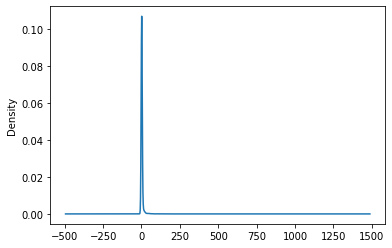

In [18]:
bgcategory_counts.plot.density()

In [27]:
# Determine which values to replace
replace_categories = list(bgcategory_counts[bgcategory_counts < 50].index)

# Replace in DataFrame
for boardgamecategory in replace_categories:
    bginfo_df.boardgamecategory = bginfo_df.boardgamecategory.replace(boardgamecategory,"Other")


# Check to make sure binning was successful
bginfo_df.boardgamecategory.value_counts()

Other                                           14763
['Card Game']                                     992
['Wargame', 'World War II']                       803
['Abstract Strategy']                             655
['Dice']                                          242
['Napoleonic', 'Wargame']                         224
['Card Game', 'Fantasy']                          223
['Party Game']                                    182
['Economic']                                      158
['Modern Warfare', 'Wargame']                     146
['Ancient', 'Wargame']                            128
['Fantasy']                                       126
['Action / Dexterity']                            124
['American Civil War', 'Wargame']                 119
["Children's Game"]                               112
['Wargame', 'World War I']                        110
['Animals', 'Card Game']                          104
['Action / Dexterity', "Children's Game"]         102
['Science Fiction', 'Wargame

In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(bginfo_df[boardgamecategory]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(boardgamecategory)
encode_df.head()

KeyError: "['American West', 'Dice', 'Exploration', 'Fighting', 'Memory']"